# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

import sys

from data_wrangling import specific_utils, process_monkey_information, base_processing_class, combine_info_utils, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class, prep_ml_data_utils
from reinforcement_learning.base_classes import env_utils, base_env, more_envs, rl_base_class, rl_base_utils
from reinforcement_learning.agents.rnn import gru_utils, lstm_utils
from reinforcement_learning.agents.feedforward import interpret_neural_network, sb3_class, sb3_utils
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_utils
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_time_series, plotly_preparation, plotly_for_correlation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils
from planning_analysis.only_cur_ff import only_cur_ff_utils, only_cur_ff_class, only_cur_ff_utils
from planning_analysis.plan_factors import plan_factors_utils, build_factor_comp, plan_factors_class, monkey_plan_factors_x_sess_class, feature_lists
from planning_analysis.agent_analysis import compare_monkey_and_agent_utils, agent_plan_factors_class, agent_plan_factors_x_sess_class
from planning_analysis.plan_factors import test_vs_control_utils
from planning_analysis.factors_vs_indicators import make_variations_utils, process_variations_utils
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils, examine_null_arcs
from planning_analysis.show_planning.cur_vs_nxt_ff import cvn_helper_class, find_cvn_utils, plot_cvn_class, plot_cvn_utils, plot_monkey_heading_helper_class, cvn_from_ref_class
from machine_learning.ml_methods import ml_methods_class, prep_ml_data_utils
from eye_position_analysis import eye_positions
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_utils, cca_cv_utils, cca_class

from importlib import reload
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101



Set up logging configuration.


/opt/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


ModuleNotFoundError: No module named 'colorcet'

# Get data

In [ ]:

# ref_point_params_based_on_mode={'time after cur ff visible': [0.1, 0],
#                                 'distance': [-150, -100, -50]},

# perm_df = pd.DataFrame()
# for monkey_name in ['monkey_Schro', 'monkey_Bruno']:
#     variations_list = specific_utils.init_variations_list_func(ref_point_params_based_on_mode,
#                                                                 monkey_name=monkey_name)
#     for index, row in variations_list.iterrows():
#         print(row)
#         ref_point_mode = row['ref_point_mode']
#         ref_point_value = row['ref_point_value']

#         ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name=monkey_name)
#         ps.initialize_monkey_sessions_df_for_one_monkey()
#         ps.get_test_and_ctrl_heading_info_df_across_sessions(
#                                 ref_point_mode=ref_point_mode, ref_point_value=ref_point_value,
#                                 save_data=False)

#         test_heading_info_df = ps.test_heading_info_df.copy()
#         ctrl_heading_info_df = ps.ctrl_heading_info_df.copy()
#         test_heading_info_df = build_factor_comp.process_heading_info_df(test_heading_info_df)
#         ctrl_heading_info_df = build_factor_comp.process_heading_info_df(ctrl_heading_info_df)

#         x = test_heading_info_df['diff_in_abs_angle_to_nxt_ff'].values
#         y = ctrl_heading_info_df['diff_in_abs_angle_to_nxt_ff'].values
#         angle_p_value = permutation_test(x, y, num_permutations=10000, alternative='greater', random_state=None)

#         x = test_heading_info_df['diff_in_abs_d_curv'].values
#         y = ctrl_heading_info_df['diff_in_abs_d_curv'].values
#         d_curv_p_value = permutation_test(x, y, num_permutations=10000, alternative='greater', random_state=None)

#         perm_df = pd.concat([perm_df, pd.DataFrame({'monkey_name': monkey_name,
#                                                     'ref_point_mode': ref_point_mode,
#                                                     'ref_point_value': ref_point_value,
#                                                     'angle_p_value': angle_p_value,
#                                                     'd_curv_p_value': d_curv_p_value})], axis=0)
#         perm_df.reset_index(drop=True, inplace=True)

# perm_df.to_csv('perm_df.csv', index=False)

## all sessions of data

In [2]:
ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Schro')
ps.initialize_monkey_sessions_df_for_one_monkey()
ps.get_test_and_ctrl_heading_info_df_across_sessions(
                        ref_point_mode='time after cur ff visible', ref_point_value=0.1,
                        save_data=False)

test_heading_info_df = ps.test_heading_info_df.copy()
ctrl_heading_info_df = ps.ctrl_heading_info_df.copy()
test_heading_info_df = build_factor_comp.process_heading_info_df(test_heading_info_df)
ctrl_heading_info_df = build_factor_comp.process_heading_info_df(ctrl_heading_info_df)

Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/opt_arc_stop_closest/control/Schro_cur_vis_0_1
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Successfully retrieved combd_heading_df_x_sessions from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_heading_info/opt_arc_stop_closest/test/Schro_cur_vis_0_1
Successfully retrieved combd_diff_in_curv_df from:  all_monkey_data/planning/monkey_Schro/combined_data/cur_and_nxt/data/combd_diff_in_curv/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm


## one session data

In [3]:
reload(plan_factors_utils)

<module 'planning_analysis.plan_factors.plan_factors_utils' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/planning_analysis/plan_factors/plan_factors_utils.py'>

In [ ]:
exists_ok = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 0]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"
pf = plan_factors_class.PlanFactors(raw_data_folder_path=raw_data_folder_path,
                                    #opt_arc_type='opt_arc_stop_closest')
                                    opt_arc_type = 'norm_opt_arc')
                                    
pf.make_plan_features_df_both_test_and_ctrl(plan_features_exists_ok=exists_ok, 
                                            already_made_ok=True, 
                                            heading_info_df_exists_ok=True,
                                            ref_point_mode='time after cur ff visible', 
                                            ref_point_value=0.1,
                                            # ref_point_mode='distance', 
                                            # ref_point_value=-150,  
                                            stops_near_ff_df_exists_ok=True,
                                            )
pf.x_var_df, pf.y_var_df = pf.make_x_and_y_var_df()

test_heading_info_df = pf.test_inst.heading_info_df.copy()
ctrl_heading_info_df = pf.ctrl_inst.heading_info_df.copy()
test_heading_info_df = build_factor_comp.process_heading_info_df(test_heading_info_df)
ctrl_heading_info_df = build_factor_comp.process_heading_info_df(ctrl_heading_info_df)

Making new: plan_features_test (cur_vis_0_1_window_-50cm_0cm)
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Removed 0 rows out of 728 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 728 rows
Retrieving shared_stops_near_ff_df succeeded
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=True`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvature calculation.
[Warning] 4.786% of ff_x_relative > ff_y_relative. Will be modified instead.
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=True`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvatur

In [17]:
reload(plan_factors_utils)
reload(plan_factors_class)

<module 'planning_analysis.plan_factors.plan_factors_class' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/planning_analysis/plan_factors/plan_factors_class.py'>

In [25]:
na_rows, na_cols = general_utils.check_na_in_df(pf.x_var_df, df_name="DataFrame", return_rows_and_columns=True)


No NA values found in DataFrame


In [ ]:
na_rows, na_cols = general_utils.check_na_in_df(pf.y_var_df, df_name="DataFrame", return_rows_and_columns=True)

In [ ]:
stop!

## monkey data across sessions

### get data

In [ ]:
ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Bruno')
ps.initialize_monkey_sessions_df_for_one_monkey()
# ps.get_plan_features_df_across_sessions(exists_ok=True, plan_features_exists_ok=True, 
#                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
ps.get_plan_features_df_across_sessions(exists_ok=True, plan_features_exists_ok=True, 
                                        heading_info_df_exists_ok=True,
                                        stops_near_ff_df_exists_ok=True, 
                                        ref_point_mode='time after cur ff visible', ref_point_value=0.1)

combd_plan_features_tc = ps.combd_plan_features_tc.copy().reset_index(drop=True)

### re-calculate planning data for both monkeys

In [ ]:
# # to re-calculate planning data
# exists_ok = True
# curv_traj_window_before_stop=[-25, 0]

# for opt_arc_type in ['norm_opt_arc', 'opt_arc_stop_first_vis_bdry', 'opt_arc_stop_closest']:
#     #opt_arc_type='opt_arc_stop_closest' # options are: norm_opt_arc, opt_arc_stop_first_vis_bdry, opt_arc_stop_closest,
    


#     ref_point_params_based_on_mode = monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode

#     variations_list = specific_utils.init_variations_list_func(ref_point_params_based_on_mode,
#                                                                 monkey_name='monkey_Schro')

#     for index, row in variations_list.iterrows():
#         ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Schro', 
#                                                                 opt_arc_type=opt_arc_type)
#         ps.initialize_monkey_sessions_df_for_one_monkey()
#         # ps.get_plan_features_df_across_sessions(exists_ok=True, plan_features_exists_ok=True, 
#         #                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
#         print(row)
#         ps.get_plan_features_df_across_sessions(exists_ok=False, plan_features_exists_ok=exists_ok, 
#                                                 heading_info_df_exists_ok=exists_ok,
#                                                 stops_near_ff_df_exists_ok=exists_ok, 
#                                                 ref_point_mode=row['ref_point_mode'], ref_point_value=row['ref_point_value'])




#     # to re-calculate planning data for a monkey
#     ref_point_params_based_on_mode = monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode

#     variations_list = specific_utils.init_variations_list_func(ref_point_params_based_on_mode,
#                                                                 monkey_name='monkey_Bruno')

#     for index, row in variations_list.iterrows():
#         ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Bruno', 
#                                                                 opt_arc_type=opt_arc_type)
#         ps.initialize_monkey_sessions_df_for_one_monkey()
#         # ps.get_plan_features_df_across_sessions(exists_ok=True, plan_features_exists_ok=True, 
#         #                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
#         print(row)
#         ps.get_plan_features_df_across_sessions(exists_ok=False, plan_features_exists_ok=exists_ok, 
#                                                 heading_info_df_exists_ok=exists_ok,
#                                                 stops_near_ff_df_exists_ok=exists_ok, 
#                                                 ref_point_mode=row['ref_point_mode'], ref_point_value=row['ref_point_value'])



### re-calculate heading_info

In [ ]:
# for curv_traj_window_before_stop in [[-25, 0]]:
#     # [-75, -0], [-50, 0], [-25, 0], 
#     for opt_arc_type in ['norm_opt_arc', 'opt_arc_stop_closest', 'opt_arc_stop_first_vis_bdry']:
#         # to re-calculate planning data for a monkey
#         exists_ok = True
#         # opt_arc_type='opt_arc_stop_closest' # options are: norm_opt_arc, opt_arc_stop_first_vis_bdry, opt_arc_stop_closest,
        


#         ref_point_params_based_on_mode = monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode

#         variations_list = specific_utils.init_variations_list_func(ref_point_params_based_on_mode,
#                                                                     monkey_name='monkey_Schro')

#         for index, row in variations_list.iterrows():
#             ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Schro',
#                                                                     opt_arc_type=opt_arc_type)
#             ps.initialize_monkey_sessions_df_for_one_monkey()
#             # ps.get_plan_features_df_across_sessions(exists_ok=True, plan_features_exists_ok=True, 
#             #                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
#             print(row)

#             ps.get_test_and_ctrl_heading_info_df_across_sessions(exists_ok=exists_ok,
#                                                     heading_info_df_exists_ok=exists_ok,
#                                                     stops_near_ff_df_exists_ok=exists_ok, 
#                                                     curv_traj_window_before_stop=curv_traj_window_before_stop,
#                                                     ref_point_mode=row['ref_point_mode'], ref_point_value=row['ref_point_value'])

#         # to re-calculate planning data for a monkey
#         ref_point_params_based_on_mode = monkey_plan_factors_x_sess_class.PlanAcrossSessions.default_ref_point_params_based_on_mode

#         variations_list = specific_utils.init_variations_list_func(ref_point_params_based_on_mode,
#                                                                     monkey_name='monkey_Bruno')

#         for index, row in variations_list.iterrows():
#             ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name='monkey_Bruno',
#                                                                     opt_arc_type=opt_arc_type)                                                             
#             ps.initialize_monkey_sessions_df_for_one_monkey()
#             # ps.get_plan_features_df_across_sessions(exists_ok=True, plan_features_exists_ok=True, 
#             #                                          ref_point_mode='time after cur ff visible', ref_point_value=0.1)
#             print(row)

#             ps.get_test_and_ctrl_heading_info_df_across_sessions(exists_ok=exists_ok,
#                                                     heading_info_df_exists_ok=exists_ok,
#                                                     stops_near_ff_df_exists_ok=exists_ok, 
#                                                     curv_traj_window_before_stop=curv_traj_window_before_stop,
#                                                     ref_point_mode=row['ref_point_mode'], ref_point_value=row['ref_point_value'])


## agent

In [ ]:
env_kwargs = {}

In [ ]:
# for 5 ff
ref_point_mode='time after cur ff visible'
ref_point_value=0.1
save_data = True
exists_ok = True
num_obs_ff = 5
model_folder_name='RL_models/SB3_stored_models/all_agents/gen_27_5_ff_0.3_flash/all_agents/time27.17_dv92.21_dw124.84_w91.59'

In [ ]:
# for 1 ff
ref_point_mode='time after cur ff visible'
ref_point_value=0.1
save_data = True
exists_ok = True
num_obs_ff = 1
model_folder_name='RL_models/SB3_stored_models/all_agents/gen_26_1_ff_0.3_flash/all_agents/time34.84_dv118.27_dw144.17_w101.32'

In [ ]:
# for 4 ff
ref_point_mode='time after cur ff visible'
ref_point_value=0.1
save_data = True
exists_ok = True
num_obs_ff = 4
model_folder_name='RL_models/SB3_stored_models/all_agents/gen_3_env1_4ff_relu/all_agents/time23.73_dv126.41_dw141.9_w87.49'

In [ ]:
pf.get_plan_features_df_across_sessions(
                        ref_point_mode=ref_point_mode, 
                        ref_point_value=ref_point_value,
                        save_data=save_data)

In [ ]:
pf.get_test_and_ctrl_heading_info_df_across_sessions(
                        ref_point_mode=ref_point_mode, 
                        ref_point_value=ref_point_value,
                        save_data=save_data)

In [ ]:
import numpy as np

def permutation_test(
    x, y, 
    num_permutations=100000, 
    alternative='two-sided', 
    statistic='median', 
    random_state=None
):
    """
    General permutation test for difference in means or medians.

    Parameters:
    - x, y: arrays of sample values from two groups
    - num_permutations: number of permutations to perform
    - alternative: 'two-sided', 'greater', or 'less'
    - statistic: 'mean' or 'median'
    - random_state: optional seed for reproducibility

    Returns:
    - p-value of the permutation test
    """
    rng = np.random.default_rng(random_state)
    x = np.asarray(x)
    y = np.asarray(y)
    
    # get rid of nan
    # print percentage of nan and get rid of nan
    print(f'percentage of nan in x: {round(np.sum(np.isnan(x)) / len(x), 3)}')
    print(f'percentage of nan in y: {round(np.sum(np.isnan(y)) / len(y), 3)}')
    print('Removing nan...')
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    
    if statistic == 'mean':
        stat_func = np.mean
    elif statistic == 'median':
        stat_func = np.median
    else:
        raise ValueError("statistic must be 'mean' or 'median'")

    observed_diff = stat_func(x) - stat_func(y)
    combined = np.concatenate([x, y])
    
    print(f'observed_diff: {observed_diff}')
    
    count = 0
    for _ in range(num_permutations):
        permuted = rng.permutation(combined)
        x_perm = permuted[:len(x)]
        y_perm = permuted[len(x):]
        perm_diff = stat_func(x_perm) - stat_func(y_perm)
        
        if _ % 5000 == 0:
            print(f'perm_diff: {perm_diff}')

        if alternative == 'two-sided':
            if abs(perm_diff) >= abs(observed_diff):
                count += 1
        elif alternative == 'greater':
            if perm_diff >= observed_diff:
                count += 1
        elif alternative == 'less':
            if perm_diff <= observed_diff:
                count += 1
        else:
            raise ValueError("alternative must be 'two-sided', 'greater', or 'less'")

    p_value = count / num_permutations
    print(f'count: {count}, num_permutations: {num_permutations}, p_value: {p_value}')
    return p_value


# check features

In [ ]:
pf.plan_features_test.columns.values

# check NA

In [ ]:
na_rows, na_cols = general_utils.check_na_in_df(pf.plan_features_tc)

In [ ]:
na_rows, na_cols = general_utils.check_na_in_df(pf.y_var_df)

# check data type

In [ ]:
# Check what's causing the object dtype
print("X variables object columns:", pf.x_var_df.dtypes[pf.x_var_df.dtypes != 'float'].index.tolist())
print("Y variables object columns:", pf.y_var_df.dtypes[pf.y_var_df.dtypes != 'float'].index.tolist())

In [ ]:
pf.y_var_df.dtypes[pf.y_var_df.dtypes != 'float']

# ML

## data

In [ ]:
pf.x_var_df, pf.y_var_df = pf.make_x_and_y_var_df()

In [27]:
ref_columns = [column for column in pf.plan_features_tc.columns if ('ref' in column) & ('cur_ff' in column)]

In [28]:
x_columns = feature_lists.all_eye_features + feature_lists.trajectory_features
x_columns = [col for col in x_columns if col in pf.x_var_df.columns]

In [29]:
cur_ff_cluster_columns = [col for col in pf.plan_features_tc.columns if 'cur_ff_cluster' in col]

## Linear regression

#### predict monkey vars

In [32]:
pf.y_var_df.columns

Index(['stop_point_index', 'stop_x', 'stop_y', 'stop_time', 'cur_ff_index',
       'cur_ff_x', 'cur_ff_y', 'cur_ff_cluster_50_size',
       'point_index_before_stop', 'monkey_angle_before_stop',
       ...
       'RDy_range_bsans', 'RDy_iqr_bsans', 'RDz_range_bsans', 'RDz_iqr_bsans',
       'left_eye_nxt_ff_time_perc_5_bsans',
       'left_eye_nxt_ff_time_perc_10_bsans',
       'right_eye_nxt_ff_time_perc_5_bsans',
       'right_eye_nxt_ff_time_perc_10_bsans', 'dt_bsans', 'whether_test'],
      dtype='object', length=443)

y_var_column: curv_of_traj_before_stop

--- Multiple Linear Regression: curv_of_traj_before_stop ---
R-squared (train):        0.7899
Adjusted R-squared:       0.5374
R-squared (test):         -0.0663
Pearson Corr (test):      0.4481
MAE (test):               13.7555
MSE (test):               317.3944
RMSE (test):              17.8156


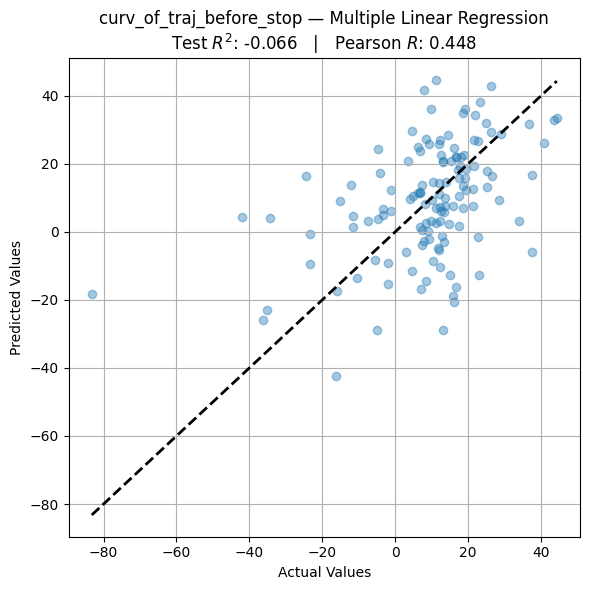

y_var_column: d_heading_of_traj

--- Multiple Linear Regression: d_heading_of_traj ---
R-squared (train):        0.9653
Adjusted R-squared:       0.9235
R-squared (test):         0.6739
Pearson Corr (test):      0.8769
MAE (test):               0.1907
MSE (test):               0.0726
RMSE (test):              0.2694


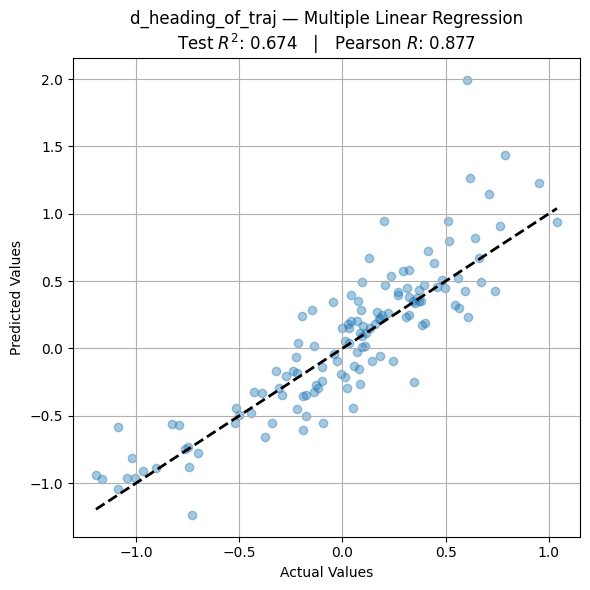

y_var_column: diff_in_angle_to_nxt_ff

--- Multiple Linear Regression: diff_in_angle_to_nxt_ff ---
R-squared (train):        0.5941
Adjusted R-squared:       0.1063
R-squared (test):         -1.4615
Pearson Corr (test):      0.1888
MAE (test):               1099.8567
MSE (test):               1825173.1364
RMSE (test):              1350.9897


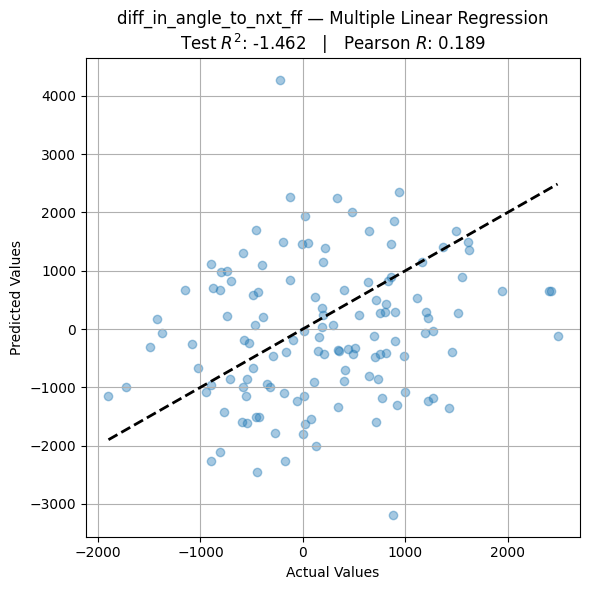

y_var_column: diff_in_abs_angle_to_nxt_ff

--- Multiple Linear Regression: diff_in_abs_angle_to_nxt_ff ---
R-squared (train):        0.5991
Adjusted R-squared:       0.1173
R-squared (test):         -1.8217
Pearson Corr (test):      0.0377
MAE (test):               872.8401
MSE (test):               1247064.8854
RMSE (test):              1116.7206


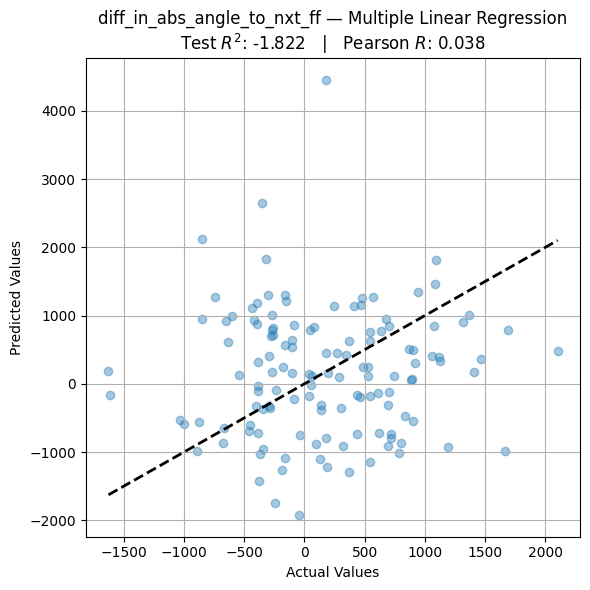

y_var_column: diff_in_d_curv
Number of rows with NaN values in y_var_df (after cleaning x_var_df and the corresponding rows in y_var_df): 79 out of 643 rows. The rows with NaN values will be dropped.

--- Multiple Linear Regression: diff_in_d_curv ---
R-squared (train):        0.6982
Adjusted R-squared:       0.2010
R-squared (test):         -1.5163
Pearson Corr (test):      0.1869
MAE (test):               36.5803
MSE (test):               2443.3834
RMSE (test):              49.4306


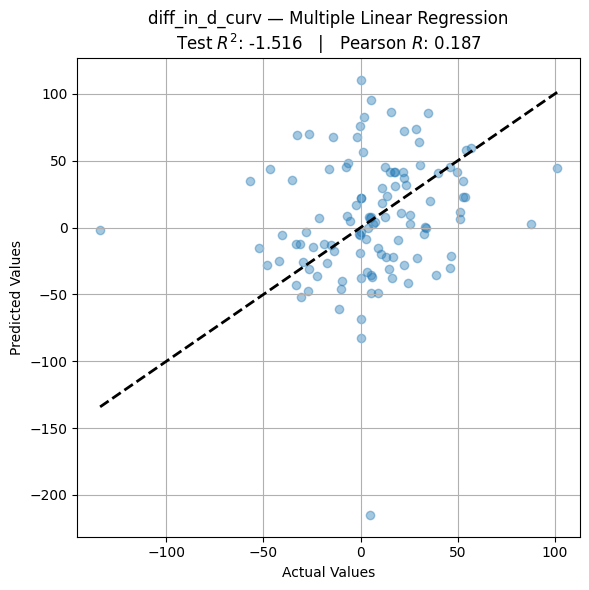

y_var_column: diff_in_abs_d_curv
Number of rows with NaN values in y_var_df (after cleaning x_var_df and the corresponding rows in y_var_df): 79 out of 643 rows. The rows with NaN values will be dropped.

--- Multiple Linear Regression: diff_in_abs_d_curv ---
R-squared (train):        0.6769
Adjusted R-squared:       0.1448
R-squared (test):         -5.7800
Pearson Corr (test):      0.0834
MAE (test):               35.6531
MSE (test):               4932.0335
RMSE (test):              70.2284


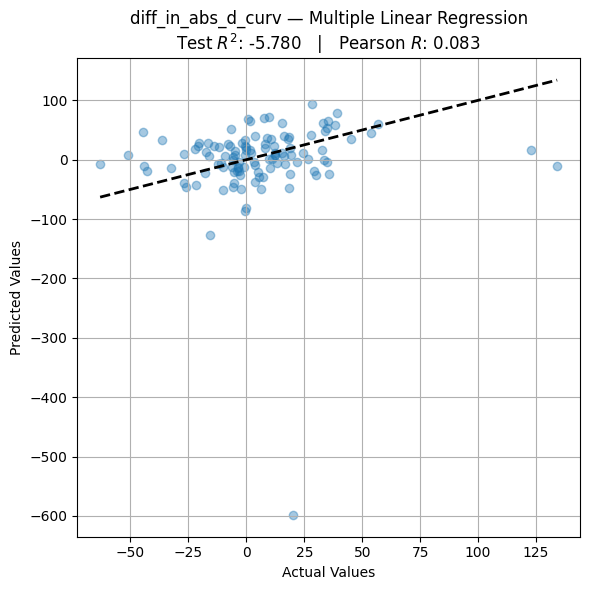

y_var_column: dir_from_cur_ff_to_stop

--- Multiple Linear Regression: dir_from_cur_ff_to_stop ---
R-squared (train):        0.6965
Adjusted R-squared:       0.3318
R-squared (test):         -2.4654
Pearson Corr (test):      0.2458
MAE (test):               1.1527
MSE (test):               3.3903
RMSE (test):              1.8413


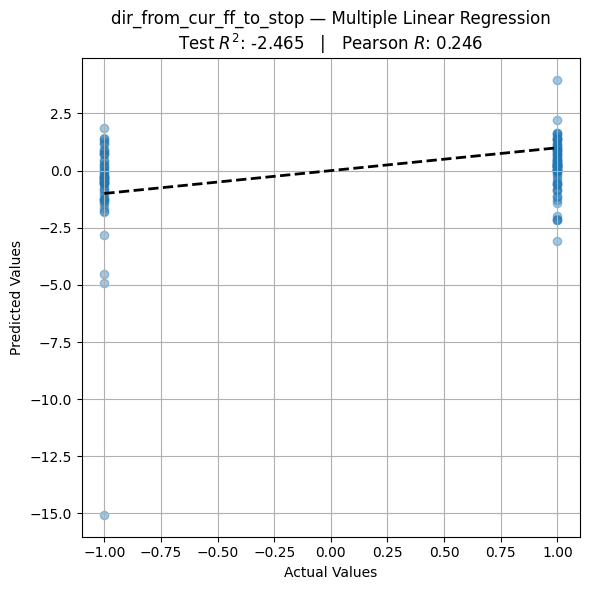

In [33]:
# plan_features_tc = pf.plan_features_tc.copy()
# pf.x_var_df, pf.y_var_df = prep_ml_data_utils.make_x_and_y_var_df(plan_features_tc, pf.plan_features_tc, drop_na=True, scale_x_var=True)
ml_inst = ml_methods_class.MlMethods()
for y_var_column in ['curv_of_traj_before_stop',
                    'd_heading_of_traj',
                    'diff_in_angle_to_nxt_ff',
                    'diff_in_abs_angle_to_nxt_ff',
                    'diff_in_d_curv',
                    'diff_in_abs_d_curv',   
                    'dir_from_cur_ff_to_stop']:
    
    print('y_var_column:', y_var_column)
    ml_inst.split_and_use_linear_regression(pf.x_var_df, pf.y_var_df[[y_var_column]])


#### predict ff vars

Number of rows with NaN values in x_var_df: 79 out of 643 rows. The rows with NaN values will be dropped.
Dropped rows with NA only in x_var_df (and the corresponding rows in y_var_df).
y_var_column: nxt_ff_distance_at_ref

--- Multiple Linear Regression: nxt_ff_distance_at_ref ---
R-squared (train):        0.4514
Adjusted R-squared:       0.4232
R-squared (test):         0.3692
Pearson Corr (test):      0.6330
MAE (test):               70.3070
MSE (test):               7780.4155
RMSE (test):              88.2067


y_var_column: nxt_ff_angle_at_ref

--- Multiple Linear Regression: nxt_ff_angle_at_ref ---
R-squared (train):        0.9465
Adjusted R-squared:       0.9438
R-squared (test):         0.9224
Pearson Corr (test):      0.9625
MAE (test):               0.0850
MSE (test):               0.0166
RMSE (test):              0.1288


y_var_column: angle_from_stop_to_nxt_ff

--- Multiple Linear Regression: angle_from_stop_to_nxt_ff ---
R-squared (train):        0.8597
Adjusted R-squared:       0.8524
R-squared (test):         0.8536
Pearson Corr (test):      0.9286
MAE (test):               287.1548
MSE (test):               159171.7697
RMSE (test):              398.9634


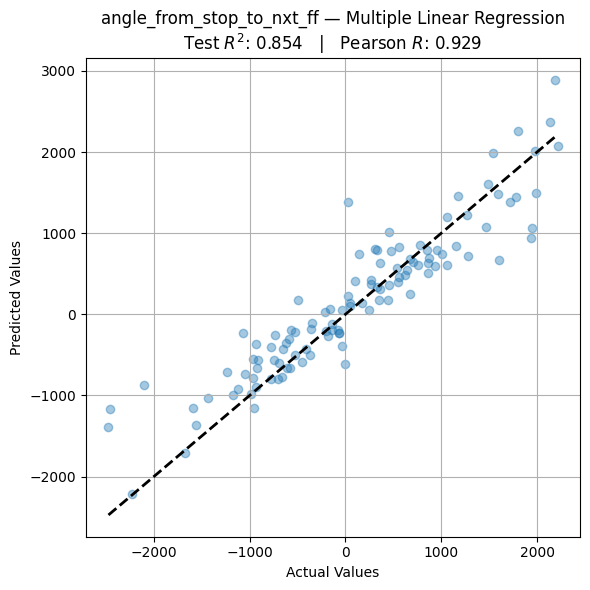

In [50]:
plan_features_tc = pf.plan_features_tc[ref_columns + ['d_heading_of_traj'] + curv_columns].copy()
pf.x_var_df2, pf.y_var_df2 = prep_ml_data_utils.make_x_and_y_var_df(plan_features_tc, pf.plan_features_tc, drop_na=True, scale_x_var=True)
ml_inst = ml_methods_class.MlMethods()
for y_var_column in ['nxt_ff_distance_at_ref',
                        'nxt_ff_angle_at_ref',
                        'angle_from_stop_to_nxt_ff']:
    if y_var_column not in pf.y_var_df2.columns:
        continue
    print('y_var_column:', y_var_column)
    ml_inst.split_and_use_linear_regression(pf.x_var_df2, pf.y_var_df2[y_var_column])


#### specific columns

In [43]:
specific_columns = [
'closer_to_cur_ff_than_nxt_ff_last_disp_earliest_vis_time',
'closer_to_cur_ff_than_nxt_ff_rightmost_latest_vis_time',
'within_n_cm_to_stop_longest_vis_ff_angle',
'nxt_ff_angle_when_nxt_ff_first_seen',
# 'nxt_ff_distance_when_nxt_ff_first_seen',
'cur_ff_angle_when_cur_ff_first_seen',
'cur_ff_distance_when_cur_ff_first_seen',
'traj_curv_when_cur_ff_first_seen',
# 'nxt_ff_angle_when_nxt_ff_last_seen',
# 'traj_curv_when_nxt_ff_last_seen',
'traj_curv_when_cur_ff_last_seen'
]

In [36]:
test_or_control = 'control'

In [37]:
y_var_column = ''

When preparing x_var to predict ff, there are 2 columns with NA that are dropped. 338 columns are left.
Columns with NA that are dropped: ['nxt_ff_cluster_last_seen_time_bbas'
 'nxt_ff_cluster_last_flash_time_bbas']

--- Simple Linear Regression: angle_from_stop_to_nxt_ff ---
R-squared (train):        0.4128
Adjusted R-squared:       0.4099
R-squared (test):         0.4831
Pearson Corr (test):      0.6979
MAE (test):               1151.7892
MSE (test):               1969532.8640
RMSE (test):              1403.4005


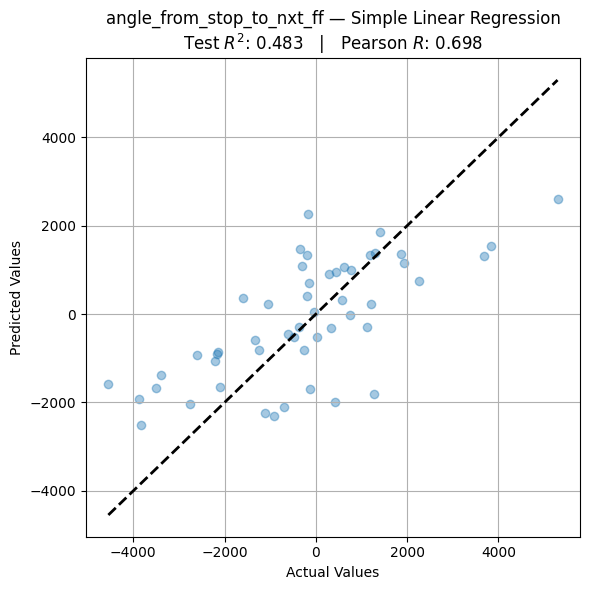

,Coefficient,Std Err,t,p_value,abs_coeff,significant,rank_by_abs_coeff
nxt_ff_angle_at_ref,1258.26194,105.58806,11.91671,0.00000,1258.26194,True,1
const,91.97577,103.44223,0.88915,0.37498,91.97577,False,2


In [ ]:
y_var_column = 'angle_from_stop_to_nxt_ff'

pf.use_lr_on_specific_x_columns(test_or_control=test_or_control, y_var_column=y_var_column,
                              specific_x_columns=['nxt_ff_angle_at_ref'])
pf.summary_df

In [ ]:
y_var_column = 'angle_from_stop_to_nxt_ff'

pf.use_lr_on_specific_x_columns(test_or_control=test_or_control, y_var_column=y_var_column,
                              specific_x_columns=['cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref'])
pf.summary_df

When preparing x_var to predict ff, there are 2 columns with NA that are dropped. 338 columns are left.
Columns with NA that are dropped: ['nxt_ff_cluster_last_seen_time_bbas'
 'nxt_ff_cluster_last_flash_time_bbas']

--- Multiple Linear Regression: angle_from_stop_to_nxt_ff ---
R-squared (train):        0.8566
Adjusted R-squared:       0.8551
R-squared (test):         0.7977
Pearson Corr (test):      0.8943
MAE (test):               550.1066
MSE (test):               575967.6563
RMSE (test):              758.9253


,Coefficient,Std Err,t,p_value,abs_coeff,significant,rank_by_abs_coeff
nxt_ff_angle_at_ref,2247.57833,65.52653,34.30028,0.00000,2247.57833,True,1
cur_ff_angle_at_ref,-1628.13702,66.36089,-24.53459,0.00000,1628.13702,True,2
const,79.65931,53.09041,1.50045,0.13507,79.65931,False,3


## do left and right have the same same-side ratio for test and control?

In [55]:
ps = pf

In [56]:
len(ps.plan_features_ctrl[ps.plan_features_ctrl['dir_from_cur_ff_to_stop'] == 1])/len(ps.plan_features_ctrl)

0.5411764705882353

In [57]:
len(ps.plan_features_test[ps.plan_features_test['dir_from_cur_ff_to_stop'] == 1])/len(ps.plan_features_test)

0.538659793814433

In [58]:
len(ps.plan_features_ctrl[ps.plan_features_ctrl['dir_from_cur_ff_same_side'] == 1])/len(ps.plan_features_ctrl)

0.5411764705882353

In [59]:
len(ps.plan_features_test[ps.plan_features_test['dir_from_cur_ff_same_side'] == 1])/len(ps.plan_features_test)

0.5670103092783505

# CCA

/var/folders/81/249hbjx960s5t_1dxgdxz6r00000gn/T/ipykernel_61976/1668449724.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.drop(columns=['data_name', 'stop_point_index'], inplace=True, errors='ignore')


Training CCA, kernel = None, regularization = 0.0100, 2 components
Canonical Correlation Per Component Pair: [0.90742 0.80316]
% Shared Variance: [0.82341 0.64506]


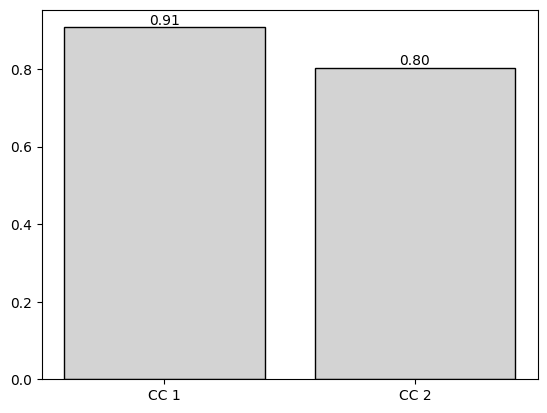

2025-08-15 19:43:34,657 - INFO - 20 out of 182 feature categories are included in the plot


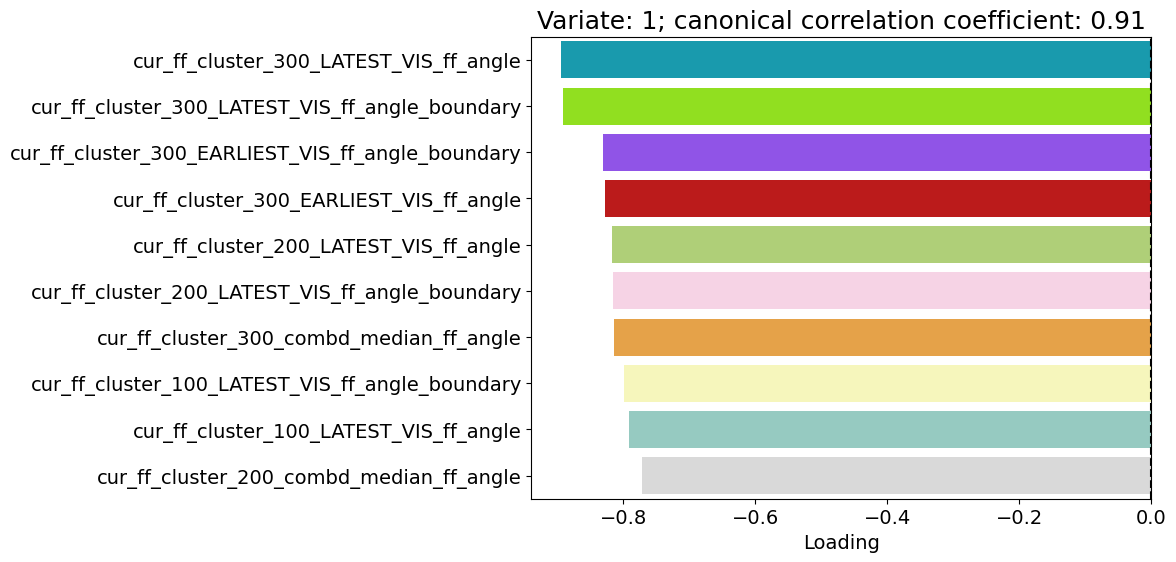

In [62]:
# Define data and scaler
from sklearn.cross_decomposition import CCA

scaler = StandardScaler()

X1 = pf.plan_features_tc[x_columns + cur_ff_cluster_columns]
X2 = pf.plan_features_tc[['nxt_ff_distance_at_ref',
                        'nxt_ff_angle_at_ref',]].copy()

#X2 = osf.only_cur_ff_df[['d_heading_of_traj']].copy()

X1.drop(columns=['data_name', 'stop_point_index'], inplace=True, errors='ignore')

cca_inst = cca_class.CCAclass(X1=X1, X2=X2, lagging_included=False)
cca_inst.conduct_cca(reg=1e-21)
cca_inst.plot_ranked_loadings(X1_or_X2='X1', squared=False)


# avg_x_loadings, avg_y_loadings, avg_canon_corrs = cca_utils.run_cca(X1, X2, n_comp=2, n_splits=5, show_plots=False)

# cca_plotting.plot_x_loadings(avg_x_loadings, avg_canon_corrs, X1)



# PCA

Number of rows with NaN values in x_var_df: 59 out of 643 rows. The rows with NaN values will be dropped.
Dropped rows with NA only in x_var_df (and the corresponding rows in y_var_df).
When preparing x_var to predict ff, there are 0 columns with NA that are dropped. 11 columns are left.
Columns with NA that are dropped: []

--- Multiple Linear Regression: angle_from_stop_to_nxt_ff ---
R-squared (train):        0.6356
Adjusted R-squared:       0.6276
R-squared (test):         0.5737
Pearson Corr (test):      0.7601
MAE (test):               818.2455
MSE (test):               1037854.1042
RMSE (test):              1018.7512


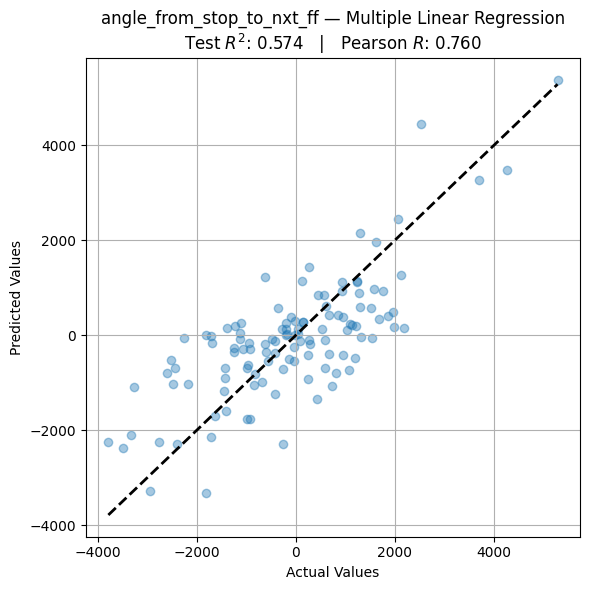

,Coefficient,Std Err,t,p_value,abs_coeff,significant,rank_by_abs_coeff
x9,-242.96655,16.76192,-14.49515,0.00000,242.96655,True,1
x10,-217.73784,17.74738,-12.26873,0.00000,217.73784,True,2
x6,-165.22234,12.55134,-13.16372,0.00000,165.22234,True,3
x8,-146.00757,17.13317,-8.52192,0.00000,146.00757,True,4
x1,76.64853,5.59544,13.69840,0.00000,76.64853,True,5
x7,-56.66782,13.41437,-4.22441,0.00003,56.66782,True,6
const,47.85612,44.29677,1.08035,0.28056,47.85612,False,7
x5,-12.15348,12.53979,-0.96919,0.33296,12.15348,False,8
x2,7.17997,11.28788,0.63608,0.52504,7.17997,False,9
x3,6.01712,12.41071,0.48483,0.62803,6.01712,False,10


In [ ]:
selected_features = plan_factors_utils.select_planning_features_for_modeling(pf.plan_features_tc,
                to_predict_ff=False, for_classification=False)
further_selected_features = [col for col in selected_features if ('ff' in col) & ('eye' not in col)]

pf.use_lr_on_all(test_or_control='both', y_var_column=y_var_column, use_pca=True, drop_na_rows=True, drop_na_cols=True,
                 selected_features=further_selected_features)
pf.summary_df.head(10)

In [100]:
pf.use_lr_on_all(test_or_control='control', y_var_column=y_var_column, use_pca=True, drop_na_rows=True, drop_na_cols=True,
                 selected_features=further_selected_features)
pf.summary_df.head(10)

Dropped rows with NA only in x_var_df (and the corresponding rows in y_var_df).
When preparing x_var to predict ff, there are 0 columns with NA that are dropped. 11 columns are left.
Columns with NA that are dropped: []

--- Multiple Linear Regression: angle_from_stop_to_nxt_ff ---
R-squared (train):        0.7446
Adjusted R-squared:       0.7314
R-squared (test):         0.6374
Pearson Corr (test):      0.8231
MAE (test):               878.4647
MSE (test):               1144065.3715
RMSE (test):              1069.6099


,Coefficient,Std Err,t,p_value,abs_coeff,significant,rank_by_abs_coeff
x6,-330.90802,20.25215,-16.33940,0.00000,330.90802,True,1
x9,228.12110,27.66925,8.24457,0.00000,228.12110,True,2
x8,-190.16610,26.56574,-7.15832,0.00000,190.16610,True,3
x1,112.01822,9.65262,11.60495,0.00000,112.01822,True,4
x7,55.87908,22.21938,2.51488,0.01272,55.87908,True,5
x10,-34.83124,28.03680,-1.24234,0.21562,34.83124,False,6
x2,-33.45834,28.60455,-1.16969,0.24357,33.45834,False,7
x5,18.85340,21.03999,0.89607,0.37133,18.85340,False,8
const,10.50457,72.58735,0.14472,0.88509,10.50457,False,9
x3,-5.31479,21.56540,-0.24645,0.80560,5.31479,False,10


In [105]:
pf.use_lr_on_all(test_or_control='both', y_var_column=y_var_column, use_pca=True, drop_na_rows=True, drop_na_cols=True,
                 selected_features=further_selected_features)
pf.summary_df.head(10)

Number of rows with NaN values in x_var_df: 59 out of 643 rows. The rows with NaN values will be dropped.
Dropped rows with NA only in x_var_df (and the corresponding rows in y_var_df).
When preparing x_var to predict ff, there are 0 columns with NA that are dropped. 11 columns are left.
Columns with NA that are dropped: []

--- Multiple Linear Regression: angle_from_stop_to_nxt_ff ---
R-squared (train):        0.6399
Adjusted R-squared:       0.6320
R-squared (test):         0.5480
Pearson Corr (test):      0.7425
MAE (test):               777.0077
MSE (test):               913468.5296
RMSE (test):              955.7555


,Coefficient,Std Err,t,p_value,abs_coeff,significant,rank_by_abs_coeff
x9,-233.36250,16.69795,-13.97552,0.00000,233.36250,True,1
x10,-221.49210,18.49970,-11.97274,0.00000,221.49210,True,2
x8,-157.88090,17.24890,-9.15310,0.00000,157.88090,True,3
x6,-152.26954,13.49509,-11.28333,0.00000,152.26954,True,4
x1,79.77868,5.64998,14.12018,0.00000,79.77868,True,5
x7,-39.58699,14.46216,-2.73728,0.00644,39.58699,True,6
const,30.81055,44.88875,0.68638,0.49283,30.81055,False,7
x5,-13.70502,11.26394,-1.21672,0.22434,13.70502,False,8
x4,-11.95212,9.82112,-1.21698,0.22424,11.95212,False,9
x3,6.07473,8.15559,0.74485,0.45674,6.07473,False,10


In [115]:
# Create a DataFrame of loadings
loadings = pf.pca.components_
feature_names = pf.original_x_df.columns
column_names = [f'x{i}' for i in range(1, loadings.shape[0]+1)]
pca_loadings_df = pd.DataFrame(loadings.T, columns=column_names, index=feature_names)

In [116]:
# show explained variance
sorted_result = pf.summary_df[pf.summary_df['p_value'] <= 0.05].sort_values(by='Coefficient', ascending=False).copy()
for i in range(len(sorted_result)):
    print('i:', i)
    sorted_result_row = sorted_result.iloc[i]
    pca_x = sorted_result_row.name
    if pca_x == 'const':
        continue
    #column = pca_loadings_df.columns[i]
    print('pca_x:', pca_x)
    print('sorted_result_row:', sorted_result_row)
    print(pca_loadings_df[pca_x].sort_values(ascending=False).head(50))
    #print(df_loadings[column].sort_values(ascending=False).tail(5))

i: 0
pca_x: x1
sorted_result_row: Coefficient         79.77868
Std Err              5.64998
t                   14.12018
p_value              0.00000
abs_coeff           79.77868
significant             True
rank_by_abs_coeff          5
Name: x1, dtype: object
nxt_ff_angle_at_ref                                   0.12049
nxt_ff_cluster_200_combd_median_ff_angle              0.12025
nxt_ff_cluster_100_combd_median_ff_angle              0.12017
nxt_ff_cluster_100_LATEST_VIS_ff_angle                0.12001
nxt_ff_cluster_100_EARLIEST_VIS_ff_angle              0.11952
nxt_ff_cluster_100_LATEST_VIS_ff_angle_boundary       0.11947
nxt_ff_cluster_100_LONGEST_VIS_ff_angle               0.11919
nxt_ff_cluster_300_combd_median_ff_angle              0.11918
nxt_ff_cluster_100_EARLIEST_VIS_ff_angle_boundary     0.11904
nxt_ff_cluster_100_LONGEST_VIS_ff_angle_boundary      0.11844
nxt_ff_cluster_100_combd_min_ff_angle                 0.11837
nxt_ff_cluster_100_RIGHTMOST_ff_angle                 0.1

In [117]:
pca_loadings_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
cur_ff_distance_at_ref,0.02385,0.05564,-0.11518,0.10881,0.06175,0.01541,-0.07605,-0.01740,-0.03035,0.00946
cur_ff_angle_at_ref,0.10198,-0.02003,0.00153,0.00636,-0.00230,0.03068,0.01705,0.06531,0.10151,0.08984
cur_ff_angle_boundary_at_ref,0.10165,-0.02188,0.00602,0.00061,-0.00596,0.02293,0.00447,0.06791,0.07746,0.10014
nxt_ff_distance_at_ref,0.01821,0.11443,-0.09578,-0.05226,-0.02103,0.01251,-0.05379,0.02680,0.01687,-0.01834
nxt_ff_angle_at_ref,0.12049,-0.01879,0.00535,-0.00205,-0.01463,-0.05656,-0.02071,-0.02218,-0.05673,-0.01958
...,...,...,...,...,...,...,...,...,...,...
nxt_ff_cluster_300_num_ff_in_cluster,0.00671,0.03052,0.00407,-0.01379,0.01521,0.07689,-0.10676,-0.03652,0.08785,-0.05635
nxt_ff_cluster_300_combd_earliest_vis_rel_time,0.00602,0.04514,-0.01377,-0.11462,0.00550,-0.03088,0.04538,0.05816,-0.03898,-0.01889
nxt_ff_cluster_300_combd_latest_vis_rel_time,0.01799,0.13893,0.07658,-0.03622,0.00141,-0.00359,-0.00504,0.00244,0.00162,-0.00399
nxt_ff_cluster_300_combd_total_vis_duration,0.01201,0.09673,0.07023,0.03968,-0.03717,0.05155,-0.05302,-0.02080,0.05358,-0.02335


In [118]:
pf.summary_df[pf.summary_df['p_value'] <= 0.05].sort_values(by='Coefficient', ascending=False)

,Coefficient,Std Err,t,p_value,abs_coeff,significant,rank_by_abs_coeff
x1,79.77868,5.64998,14.12018,0.00000,79.77868,True,5
x7,-39.58699,14.46216,-2.73728,0.00644,39.58699,True,6
x6,-152.26954,13.49509,-11.28333,0.00000,152.26954,True,4
x8,-157.88090,17.24890,-9.15310,0.00000,157.88090,True,3
x10,-221.49210,18.49970,-11.97274,0.00000,221.49210,True,2
x9,-233.36250,16.69795,-13.97552,0.00000,233.36250,True,1


## non-linearity

In [119]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Assuming X_train and y_train are your features and target variable
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(pf.x_var_df)

# Convert to DataFrame for better handling
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())


In [120]:
pf.x_var_df = X_poly_df.copy()

In [121]:
pf.y_var_df.reset_index(drop=True, inplace=True)


--- Multiple Linear Regression: angle_from_stop_to_nxt_ff ---
R-squared (train):        0.7464
Adjusted R-squared:       0.7053
R-squared (test):         0.6457
Pearson Corr (test):      0.8040
MAE (test):               719.2779
MSE (test):               784485.4679
RMSE (test):              885.7118


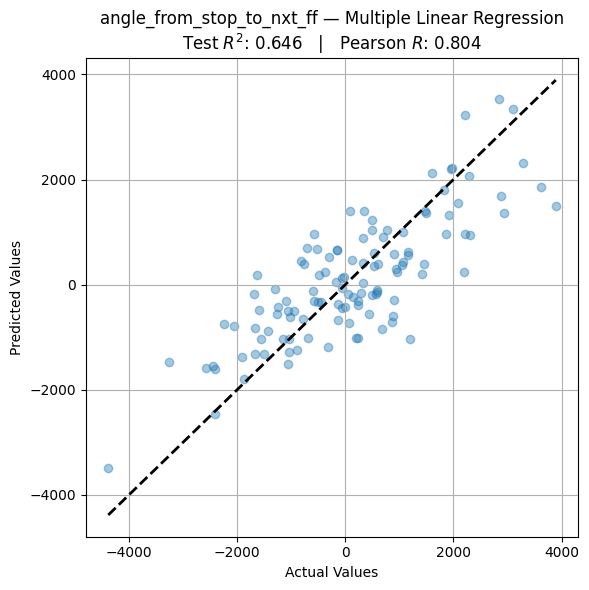

In [125]:
ml_inst = ml_methods_class.MlMethods()
ml_inst.split_and_use_linear_regression(X_poly_df, pf.y_var_df[y_var_column])

## vif

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
pf.vif_df[pf.vif_df['feature']=='dummy']

In [ ]:
pf.vif_df.iloc[:30]

## correlation heatmap

In [ ]:
specific_columns = [column for column in pf.vif_df['feature'].values if 'ff_angle' in column]

In [ ]:
specific_columns = [column for column in pf.vif_df['feature'].values if 'better_angle_than_nxt_ff' in column]

In [ ]:
specific_columns = [column for column in pf.vif_df['feature'].values if 'cur_ff_cluster_100' in column]


In [ ]:
ml_inst.show_correlation_heatmap(specific_columns=None)

## neural network

In [ ]:
ml_inst.use_neural_network()

# Data summary

In [ ]:
heading_info_df = ps.test_heading_info_df.copy()

In [ ]:
heading_info_df = ps.ctrl_heading_info_df.copy()

In [ ]:
heading_info_df[['cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'd_heading_of_traj', 'cur_opt_arc_d_heading']] = heading_info_df[['cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'd_heading_of_traj', 'cur_opt_arc_d_heading']]*180/math.pi

In [ ]:
(pf.plan_features_tc[['cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref']]*180/math.pi).describe()

### Diff vs diff in abs

In [ ]:
sns.histplot(pf.plan_features_tc['diff_in_angle_to_nxt_ff'], color='blue', alpha=0.4, binrange=(-75, 75), label='diff_in_angle_to_nxt_ff')
sns.histplot(pf.plan_features_tc['diff_in_abs_angle_to_nxt_ff'], color='orange', alpha=0.4, binrange=(-75, 75), label='diff_in_abs_angle_to_nxt_ff')
plt.legend()
plt.show()

### take out nxt ff angle to the right at ref

 filtering the dataset to only include trials where the next firefly (nxt_ff) is positioned to the right of the monkey at the reference point, to see if monkey is biased to any direction

In [ ]:
plan_features_tc = pf.plan_features_tc.copy()

In [ ]:
plan_features_sub = plan_features_tc[plan_features_tc['nxt_ff_angle_at_ref'] < 0].copy()

In [ ]:
print('ratio of trials where nxt ff is to the right of the monkey at ref:', round(plan_features_sub.shape[0] / pf.plan_features_sub.shape[0], 2)
      )

In [ ]:
(plan_features_sub[['diff_in_angle_to_nxt_ff', 'diff_in_abs_angle_to_nxt_ff']]).describe()

In [ ]:
heading_sub = pf.heading_info_df[pf.heading_info_df['nxt_ff_angle_at_ref'] < 0].copy()

In [ ]:
# control
heading_sub[['diff_in_angle_to_nxt_ff', 'diff_in_abs_angle_to_nxt_ff', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_stop_to_nxt_ff', 'angle_opt_cur_end_to_nxt_ff']].describe()

In [ ]:
# test
heading_sub[['diff_in_angle_to_nxt_ff', 'diff_in_abs_angle_to_nxt_ff', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_stop_to_nxt_ff', 'angle_opt_cur_end_to_nxt_ff']].describe()

In [ ]:
# control
heading_info_df = build_factor_comp.process_heading_info_df(pf.ctrl_inst.heading_info_df)
heading_info_df[['diff_in_angle_to_nxt_ff', 'diff_in_abs_angle_to_nxt_ff', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_stop_to_nxt_ff', 'angle_opt_cur_end_to_nxt_ff']].describe()

In [ ]:
# test
heading_info_df = build_factor_comp.process_heading_info_df(pf.test_inst.heading_info_df)
heading_info_df[['diff_in_angle_to_nxt_ff', 'diff_in_abs_angle_to_nxt_ff', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_stop_to_nxt_ff', 'angle_opt_cur_end_to_nxt_ff']].describe()

In [ ]:
# check only the sub-set of trials where nxt ff is to the right of the monkey at ref
heading_info_df = build_factor_comp.process_heading_info_df(pf.ctrl_inst.heading_info_df)
heading_sub2 = heading_info_df[heading_info_df['nxt_ff_angle_at_ref'] > 0].copy()
heading_sub2[['diff_in_angle_to_nxt_ff', 'diff_in_abs_angle_to_nxt_ff', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_stop_to_nxt_ff', 'angle_opt_cur_end_to_nxt_ff']].describe()

In [ ]:
# test
heading_info_df = build_factor_comp.process_heading_info_df(pf.test_inst.heading_info_df)
heading_sub2 = heading_info_df[heading_info_df['nxt_ff_angle_at_ref'] > 0].copy()
heading_sub2[['diff_in_angle_to_nxt_ff', 'diff_in_abs_angle_to_nxt_ff', 'cur_ff_angle_at_ref', 'nxt_ff_angle_at_ref', 'angle_from_stop_to_nxt_ff', 'angle_opt_cur_end_to_nxt_ff']].describe()

## histplot of ratios/diff

In [ ]:
# pf.make_plan_features_tc(already_made_ok=True)

In [ ]:
sns.histplot(pf.plan_features_test['ratio_of_angle_to_nxt_ff'], bins=100, binrange=(-20, 20), stat='probability', alpha=0.5, label='test')
sns.histplot(pf.plan_features_ctrl['ratio_of_angle_to_nxt_ff'], bins=100, binrange=(-20, 20), stat='probability', alpha=0.5, label='ctrl')
plt.legend()
plt.show()

In [ ]:
binrange = (-80, 80)
sns.histplot(pf.plan_features_test['diff_in_abs_angle_to_nxt_ff'], bins=100, stat='probability', binrange=binrange, alpha=0.5, color='blue', label='test')
sns.histplot(pf.plan_features_ctrl['diff_in_abs_angle_to_nxt_ff'], bins=100, stat='probability', binrange=binrange, alpha=0.5, color='orange', label='ctrl')
plt.legend()
plt.show()

In [ ]:
sns.histplot(pf.plan_features_test['ratio_of_angle_to_nxt_ff'], bins=100, binrange=(-20, 20), stat='probability')
sns.histplot(pf.plan_features_ctrl['ratio_of_angle_to_nxt_ff'], bins=100, binrange=(-20, 20), stat='probability')
plt.show()

In [ ]:
binrange = (-80, 80)
sns.histplot(pf.plan_features_test['diff_in_abs_angle_to_nxt_ff'], bins=100, stat='probability', binrange=binrange, alpha=0.5, label='test')
sns.histplot(pf.plan_features_ctrl['diff_in_abs_angle_to_nxt_ff'], bins=100, stat='probability', binrange=binrange, alpha=0.5, label='ctrl')
plt.legend()
plt.show()

## barplots of ratios/diff

In [ ]:
sns.boxplot(pf.plan_features_tc, x='whether_test', y='diff_in_abs_angle_to_nxt_ff')
plt.ylim(-80, 80)
plt.show()

In [ ]:
sns.boxplot(pf.plan_features_tc, x='whether_test', y='ratio_of_angle_to_nxt_ff')
#sns.boxplot(pf.plan_features_ctrl['ratio_of_angle_to_nxt_ff'])
plt.ylim(-5, 5)
plt.show()

In [ ]:

ratio_stat = pd.concat([pf.plan_features_test['ratio_of_angle_to_nxt_ff'].describe(), pf.plan_features_ctrl['ratio_of_angle_to_nxt_ff'].describe()], axis=1)
ratio_stat.columns = ['test_ratio_of_angle_to_nxt_ff', 'ctrl_ratio_of_angle_to_nxt_ff']
diff_stat = pd.concat([pf.plan_features_test['diff_in_abs_angle_to_nxt_ff'].describe(), pf.plan_features_ctrl['diff_in_abs_angle_to_nxt_ff'].describe()], axis=1)
diff_stat.columns = ['test_diff_in_abs_angle_to_nxt_ff', 'ctrl_diff_in_abs_angle_to_nxt_ff']
all_stat = pd.concat([ratio_stat, diff_stat], axis=1)
all_stat

## polar plot

In [ ]:
gc.collect()

In [ ]:
pf.load_raw_data(raw_data_folder_path=pf.raw_data_folder_path)

In [ ]:
pf.compare_test_and_control_in_plotly_polar_plots(max_instances_each=50, start='stop_point_index', end='next_stop_point_index')

## histplot of ff angle at ref

In [ ]:
pf.make_stops_near_ff_and_ff_comparison_dfs(test_or_control='control')
both_ff_at_ref_df_ctrl = pf.get_both_ff_at_ref_df()
nxt_ff_at_stop_df_ctrl = pf.get_nxt_ff_at_stop_df()

In [ ]:
pf.make_stops_near_ff_and_ff_comparison_dfs(test_or_control='test')
pf._find_nxt_ff_df_2_and_cur_ff_df_2_based_on_specific_point_index(all_point_index=pf.cur_ff_df['point_index_ff_first_seen'].values)
test_df = pf.get_both_ff_at_ref_df().copy()

In [ ]:

pf.make_stops_near_ff_and_ff_comparison_dfs(test_or_control='control')
pf._find_nxt_ff_df_2_and_cur_ff_df_2_based_on_specific_point_index(all_point_index=pf.cur_ff_df['point_index_ff_first_seen'].values)
ctrl_df = pf.get_both_ff_at_ref_df().copy()

In [ ]:
# print shape of test_df and ctrl_df
print('test_df.shape:', test_df.shape)
print('ctrl_df.shape:', ctrl_df.shape)

# plot histogram of nxt_ff_angle_at_ref for test_df and ctrl_df
sns.histplot(test_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.25, alpha=0.5, label='test')
sns.histplot(ctrl_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.26, alpha=0.5, label='ctrl')
plt.legend()
plt.show()

In [ ]:
# note: this is based on plan_features_test and plan_features_ctrl, not both_ff_at_ref_df as calculated above
print('pf.plan_features_test.shape:', pf.plan_features_test.shape)
print('pf.plan_features_ctrl.shape:', pf.plan_features_ctrl.shape)

sns.histplot(pf.plan_features_test['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.1, alpha=0.5, label='test')
sns.histplot(pf.plan_features_ctrl['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.1, alpha=0.5, label='ctrl')
plt.legend()
plt.show()

In [ ]:
sns.histplot(test_df['cur_ff_angle_at_ref'], stat='probability', binwidth=0.25, alpha=0.5, label='test')
sns.histplot(ctrl_df['cur_ff_angle_at_ref'], stat='probability', binwidth=0.27, alpha=0.5, label='ctrl')
plt.legend()
plt.show()

In [ ]:
sns.histplot(test_df['cur_ff_distance_at_ref'], stat='probability', binwidth=20, alpha=0.5, label='test')
sns.histplot(ctrl_df['cur_ff_distance_at_ref'], stat='probability', binwidth=21, alpha=0.5, label='ctrl')
plt.legend()
plt.show()

In [ ]:
sns.histplot(test_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=20, alpha=0.5, label='test')
sns.histplot(ctrl_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=20, alpha=0.5, label='ctrl')
plt.legend()
plt.show()

In [ ]:
stop!

# Remake heading_info_df

In [ ]:
ref_point_mode = 'time after cur ff visible'
ref_point_value = 0.1

In [ ]:
ref_point_mode = 'distance'
ref_point_value = -100

In [ ]:
gc.collect()

In [ ]:
# ref_point_mode = 'distance'
# ref_point_value = -150

ref_point_mode = 'time after cur ff visible'
ref_point_value = 0.1
monkey_name='monkey_Schro'

ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name=monkey_name)
sp = show_planning_class.ShowPlanning(monkey_name=monkey_name)
ps.test_heading_info_df, ps.ctrl_heading_info_df = sp.make_or_retrieve_combd_heading_df_x_sessions_from_both_test_and_control(ref_point_mode, ref_point_value, combd_heading_df_x_sessions_exists_ok=True,
                                                                show_printed_output=True, heading_info_df_exists_ok=True,
                                                                stops_near_ff_df_exists_ok=False)

ps.process_both_heading_info_df()     


#column_for_split = 'nxt_ff_last_flash_time_bbas'
#column_for_split = 'nxt_ff_cluster_last_flash_time_bbas'
#column_for_split = 'NXT_time_ff_last_seen_bbas'
column_for_split = 'nxt_ff_cluster_last_seen_time_bbas'
test_and_ctrl_heading_info_df = pd.concat([ps.test_heading_info_df, ps.ctrl_heading_info_df[ps.test_heading_info_df.columns]], axis=0)
ps.ctrl_heading_info_df = test_and_ctrl_heading_info_df[test_and_ctrl_heading_info_df[column_for_split].isnull()].copy()
ps.test_heading_info_df = test_and_ctrl_heading_info_df[~test_and_ctrl_heading_info_df[column_for_split].isnull()].copy()



ps.filter_both_heading_info_df(max_curv_range=150)
test_df = ps.test_heading_info_df.copy()
ctrl_df = ps.ctrl_heading_info_df.copy()
diff_and_ratio_stat_df = show_planning_utils.make_diff_and_ratio_stat_df(test_df, ctrl_df)
print(diff_and_ratio_stat_df)

## compare distributions

In [ ]:
sns.histplot(test_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=10, alpha=0.5, color='blue')
sns.histplot(ctrl_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=10, alpha=0.5, color='green')
plt.show()

In [ ]:
sns.histplot(test_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.2, alpha=0.5, color='blue')
sns.histplot(ctrl_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.2, alpha=0.5, color='green')
plt.show()

In [ ]:
sns.histplot(test_df['next_stop_time']-test_df['stop_time'], stat='probability', binwidth=0.1, alpha=0.5, color='blue')
sns.histplot(ctrl_df['next_stop_time']-ctrl_df['stop_time'], stat='probability', binwidth=0.1, alpha=0.5, color='green')
plt.xlim([0, 10])
plt.show()

In [ ]:
sns.histplot(test_df['next_stop_point_index']-test_df['stop_point_index'], stat='probability', binwidth=10, alpha=0.5, color='blue')
sns.histplot(ctrl_df['next_stop_point_index']-ctrl_df['stop_point_index'], stat='probability', binwidth=10, alpha=0.5, color='green')
plt.xlim([0, 1000])
plt.show()

In [ ]:
sns.histplot(test_df['cum_distance_between_two_stops'], stat='probability', alpha=0.5, color='blue', binwidth=25)
sns.histplot(ctrl_df['cum_distance_between_two_stops'], stat='probability', alpha=0.5, color='green', binwidth=24)
plt.xlim([0, 700])
plt.show()

In [ ]:
len(test_df[~test_df['nxt_ff_cluster_last_flash_time_bbas'].isnull()])/len(test_df)

In [ ]:
len(ctrl_df[~ctrl_df['nxt_ff_cluster_last_flash_time_bbas'].isnull()])/len(ctrl_df)

In [ ]:
len(test_df[~test_df['nxt_ff_cluster_last_flash_time_bsans'].isnull()])/len(test_df)

In [ ]:
len(ctrl_df[~ctrl_df['nxt_ff_cluster_last_flash_time_bsans'].isnull()])/len(ctrl_df)

# Others

## check ff vs ff cluster

In [ ]:
ff_column = 'nxt_ff_last_seen_rel_time_bbas'
cluster_column = 'nxt_ff_cluster_last_seen_rel_time_bbas'
df = pf.test_inst.shared_stops_near_ff_df

find_cvn_utils.check_ff_vs_cluster(df, ff_column, cluster_column)

In [ ]:
ff_column = 'NXT_time_ff_last_seen_bbas'
cluster_column = 'nxt_ff_last_flash_time_bbas'

find_cvn_utils.check_ff_vs_cluster(df, ff_column, cluster_column)

In [ ]:
ff_column = 'nxt_ff_cluster_last_seen_time_bbas'
cluster_column = 'nxt_ff_cluster_last_flash_time_bbas'

find_cvn_utils.check_ff_vs_cluster(df, ff_column, cluster_column)

In [ ]:
len_subset = len(df[(df[ff_column].isnull()) & (~df[cluster_column].isnull())])
print(f'There are {len_subset} rows where {ff_column} is null but {cluster_column} is not null out of {len(df)} rows')

In [ ]:
df = test_and_ctrl_heading_info_df
df[(df[ff_column].isnull()) & (~df[cluster_column].isnull())][['nxt_ff_distance_at_ref', 'nxt_ff_angle_at_ref']].describe()

In [ ]:
df[['nxt_ff_distance_at_ref', 'nxt_ff_angle_at_ref']].describe()

## see curv_of_traj

In [ ]:
gc.collect()

In [ ]:
current_index = 2

In [ ]:
for index, row in dc.stops_near_ff_df_counted.iterrows():
    if index > current_index:
        current_index += 1
    else:
        continue
    dc.stops_near_ff_row = row
    dc.stop_point_index = row.stop_point_index
    dc._prepare_to_make_plotly_fig_for_dash_given_stop_point_index(dc.stop_point_index)
    dc._further_prepare_plotting_info_for_the_duration()
    dc.fig = dc._produce_fig_for_dash()
    dc.plt.show()

    duration = [row['stop_time'], row['next_stop_time']]
    curv_sub = dc.curv_of_traj_df[dc.curv_of_traj_df['time'].between(*duration)].copy()
    plt.scatter(curv_sub['time'], curv_sub['curv_of_traj'] * 180/math.pi)
    plt.show()

    if index == current_index + 10:
        break

## Experiment on evening out angles

In [ ]:
ps = pf

In [ ]:
ref_point_mode = 'distance'
ref_point_value = -150
monkey_name = 'monkey_Bruno'

ps = monkey_plan_factors_x_sess_class.PlanAcrossSessions(monkey_name=monkey_name)
sp = show_planning_class.ShowPlanning(monkey_name=monkey_name)
ps.test_heading_info_df, ps.ctrl_heading_info_df = sp.make_or_retrieve_combd_heading_df_x_sessions_from_both_test_and_control(ref_point_mode, ref_point_value, combd_heading_df_x_sessions_exists_ok=True,
                                                                show_printed_output=True, heading_info_df_exists_ok=True,
                                                                stops_near_ff_df_exists_ok=True)
ps.process_both_heading_info_df()

#column_for_split = 'nxt_ff_last_flash_time_bbas'
#column_for_split = 'nxt_ff_cluster_last_flash_time_bbas'
#column_for_split = 'NXT_time_ff_last_seen_bbas'
column_for_split = 'nxt_ff_cluster_last_seen_time_bbas'
test_and_ctrl_heading_info_df = pd.concat([ps.test_heading_info_df, ps.ctrl_heading_info_df[ps.test_heading_info_df.columns]], axis=0)
ps.ctrl_heading_info_df = test_and_ctrl_heading_info_df[test_and_ctrl_heading_info_df[column_for_split].isnull()].copy()
ps.test_heading_info_df = test_and_ctrl_heading_info_df[~test_and_ctrl_heading_info_df[column_for_split].isnull()].copy()



ps.filter_both_heading_info_df(max_curv_range=150)
test_df = ps.test_heading_info_df.copy()
ctrl_df = ps.ctrl_heading_info_df.copy()
diff_and_ratio_stat_df = show_planning_utils.make_diff_and_ratio_stat_df(test_df, ctrl_df)
print(diff_and_ratio_stat_df)

KeyboardInterrupt: 

In [ ]:
ps.ctrl_heading_info_df.shape

In [ ]:
ps.ctrl_heading_info_df

In [ ]:


diff_and_ratio_stat_df = show_planning_utils.make_diff_and_ratio_stat_df(ps.test_heading_info_df, ps.ctrl_heading_info_df)
print(diff_and_ratio_stat_df)

In [ ]:
sns.histplot(ps.test_heading_info_df['cur_ff_angle_at_ref'], stat='probability', binwidth=0.1, alpha=0.5, color='blue')
sns.histplot(ps.ctrl_heading_info_df['cur_ff_angle_at_ref'], stat='probability', binwidth=0.1, alpha=0.5, color='orange')
plt.show()

In [ ]:
sns.histplot(ps.test_heading_info_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=10, alpha=0.5, color='blue')
sns.histplot(ps.ctrl_heading_info_df['nxt_ff_distance_at_ref'], stat='probability', binwidth=10, alpha=0.5, color='orange')
plt.show()

In [ ]:
sns.histplot(ps.test_heading_info_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.2, alpha=0.5, color='blue')
sns.histplot(ps.ctrl_heading_info_df['nxt_ff_angle_at_ref'], stat='probability', binwidth=0.2, alpha=0.5, color='orange')
plt.show()

In [ ]:
y1 = 'test_diff_in_abs_angle_to_nxt_ff'
y2 = 'ctrl_diff_in_abs_angle_to_nxt_ff'

## Other features examined in the past

In [ ]:
['num_closer_than_nxt_ff_to_stop', 'num_ff_visible_later_than_nxt_ff_before_stop',
'num_ff_within_n_cm_to_stop', 'nxt_ff_cluster_size',
'cur_ff_cluster_size']